# Lab 9: Unsupervised Learning Continued: Comparing PCA & tSNE
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2020

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by John Huddleston, Eleanor Lutz & Eliza Barkan. Lab today is based on demonstrations from [Luuk Derksen](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b) and [Aditya Sharma](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python).

### Table of Contents
1. Compare tSNE vs. PCA on MNIST dataset
1. Compare tSNE vs. PCA applied to breast cancer dataset

### Helpful resources
- [t-SNE vs. PCA](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
- [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas

### scikit learn
- [An introduction to machine learning with Scikit-Learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Scikit-Learn user guide](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-Learn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116) by Python for Data Science

### seaborn
  - [seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
  - [seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
  
### pandas
  - [pandas cheatsheet](https://canvas.uw.edu/files/46440511/download?download_frd=1)
  - [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html) (for reference): includes everything you'd want to know about pandas
  - [pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html): provides a "10 minute" introduction to the pandas interface
  
### matplotlib
  - [matplotlib's pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html): describes basic interface to matplotlib
  - [matplotlib's usage guide](https://matplotlib.org/tutorials/introductory/usage.html): includes helpful anatomy of a figure

### Data
- Part 1: MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike. Source: [MNIST Competition on Kaggle](https://www.kaggle.com/c/digit-recognizer) 
- Part 2: The breast cancer data set of breast cancer tumors from the Wisconsin Diagnostic Breast Cancer (WDBC) [database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set()
sns.set_style("ticks")

Today, we want to see what patterns emerge from a datset when we apply unsupervised learning techniques of PCA and t-SNE. **One of the most major differences between PCA and t-SNE is that tSNE preserves only local similarities whereas PCA preserves large distances that maximize variance.**

### Dimensionality reduction using PCA
PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. **It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.** It does not do this using guesswork but using hard mathematics and it uses something known as the eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.


### T-Distributed Stochastic Neighbouring Entities (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. **Contrary to PCA it is not a mathematical technique but a probablistic one.** The original paper describes the working of t-SNE as:

“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.

Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. The way it does this is **computationally quite heavy and therefore there are some (serious) limitations to the use of this technique.**

[Source](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)  Credit: Luuk Derksen


To learn more about how PCA and tSNE differ, we are going to use the MNIST dataset. MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

[Source: MNIST Competition on Kaggle](https://www.kaggle.com/c/digit-recognizer) 

<img src="https://miro.medium.com/max/1168/1*2lSjt9YKJn9sxK7DSeGDyw.jpeg" />



The dataset is organized where each column is a position in 3D space represented as white to black (0 to 255) and each row represents a different image.

**Exercise 1**: Read in `MNIST_dataset.csv` and save it as a variable named `mnist_df`. Check that the shape is 60000 rows by 785 columns.

We will use only the first 10000 images as to not overburden the tSNE algorithm, which is much more computational expensive compared to PCA so it runs much slower.


In [4]:
N = 10000
mnist_df_short = mnist_df[:N].copy()
print(mnist_df_short.shape)


(10000, 785)


Let's next separate the labels from the data values so we can do PCA and tSNE on only the values, not the labels! 

**Exercise 2**: Subset the `mnist_df_short` dataframe into `mnist_values`. By doing this we can run PCA and tSNE on only the feature values and then visualize the distribution of datapoints with the labels at the end. Remember that you can use the `your_df_name.values[:,:]` command to subset only the values in your dataframe like you would index a numpy array.  This means you do not need to worry about excluding the column names, they will already be excluded when you use this command. 

At this end of this same command, use `.astype(float)` to convert all the values to float. A value of `50` will be converted to `50.0`. It still means essentially the same thing, but the data type has changed from a float to an int.

We can test that Exercise 2 was successful by printing the shape of and inspecting `mnist_values`. The `mnist_values` dataframe should have one less column than the `mnist_df_short` dataframe since the labels column should be removed.

# Part 1: PCA

Let's now do PCA on the mnist_values, specifying only 2 components.

In [1]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mnist_values)
mnist_df_short['pca1'] = pca_result[:,0]
mnist_df_short['pca2'] = pca_result[:,1] 

# print the proportion of variance explained by each PC
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.10200027 0.07215439]


Let's now plot the two PCs, labeled by their ground truth number label. 

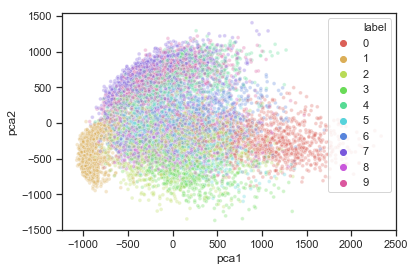

In [8]:
sns.scatterplot(x="pca1", y="pca2", hue="label", 
                palette=sns.color_palette("hls", 10), s = 14,
                data=mnist_df_short,legend="full", alpha=0.3)


**Exercise 3**: In a comment below, write down what you notice about the number label distribution in the PCA above?

In [ ]:
### 

# Part 1: tSNE

t-SNE is an alternate algorithm for mapping high dimensional data to much smaller dimensions (usually 2-d).

For more details, see [scikit-learn's user guide on t-SNE](http://scikit-learn.org/stable/modules/manifold.html#t-sne) and Distill's guide on [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/).

Next, let's run tSNE on the same data specifying only 2 components and keep track of how long it takes. It should only take  about 2.5 minutes to run.

In [9]:
from sklearn.manifold import TSNE
import time

In [10]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(mnist_values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.524s...
[t-SNE] Computed neighbors for 10000 samples in 117.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 448.615178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.417480
[t-SNE] KL divergence after 300 iterations: 2.813684
t-SNE done! Time elap

Next, we will save the first two tsne components to our original dataframe so we can plot them with labels.

In [11]:
mnist_df_short['tsne1'] = tsne_results[:,0]
mnist_df_short['tsne2'] = tsne_results[:,1]


Visualize the first tSNE components, labels by ground truth number.

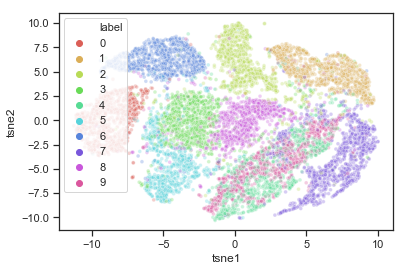

In [12]:
sns.scatterplot(x="tsne1", y="tsne2",hue="label",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_short, legend="full", s= 14, alpha=0.3)

We can see that is already a significant improvement over the PCA visualisation we used earlier. We can see that the digits are very clearly clustered in their own sub groups. If we would now use a clustering algorithm to pick out the seperate clusters we could probably quite accurately assign new points to a label. Just to compare PCA & T-SNE:

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_short,
    legend="full",
    alpha=0.3,
    s = 14, 
    ax=ax1)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=mnist_df_short,
    legend="full",
    alpha=0.3,
    s = 14,
    ax=ax2)

**Exercise 4**: What do you notice is different/similar between PCA and tSNE? What numbers seem to cluster together? What clusters tend to be homogeneous and not cluster with other numbers? Why do you think that is? Comment your answer below.


In [13]:
### 

## Lab 9 Part 2: tSNE vs. PCA applied to breast cancer dataset
Now let's try comparing PCA and tSNE on a biological dataset. We have a dataset of breast cancer tumors from the Wisconsin Diagnostic Breast Cancer (WDBC) [database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The breast cancer data set is real multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

**Exercise 5**: Read in `bc_data.txt` and save it as a variable named `bc_df`. Inspect the data and check that the shape is 569 rows by 31 columns. Hint: use `index_col = 0` as a parameter of `pd.read_csv()` to make the first column the index column.


Next, let's make the labels column more specific, replacing 0s with "Benign" and 1s with "Malignant".

In [15]:
bc_df['label'].replace(0, 'Benign',inplace=True)
bc_df['label'].replace(1, 'Malignant',inplace=True)
bc_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


**Exercise 6:** Just as you did in Exercise 2, subset the `bc_df` dataframe into `bc_values` by selecting all the data values and not the labels. By doing this we can run PCA and tSNE on only the feature values and then visualize the distribution of the labels at the end. Remember that you can use the `df_name.values[:,:]` command to subset only the values in your dataframe like you would index a numpy array.  This means you do not need to worry about excluding the column names, they will already be excluded when you use this command.

At this end of this same command, use `.astype(float)` to convert all the values to float. A value of `50` will be converted to `50.0`. It still means essentially the same thing, but the data type has changed from a float to an int.

We can test that Exercise 5 was successful by printing the shape of and inspecting `bc_values`. The `bc_values` dataframe should have one less column than the `bc_df` dataframe since the labels column should be removed. The dataset is small enough that we do not need to shorten it like we did in Part 1.

## Part 2: Standardization

All of the columns in the MNIST data were of the same measurment type (ranging from 1-255), meaning you did not need to normalize the data to have the same magnitude. Measurments in the breast cancer dataset are not of the same magnitude. PCA is influenced by the scale of the features of the data so we need to apply a normalization to the data to make sure when we compare the different feature values to each other, we are comparing apples to apples. It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and apply scaling by doing fit_transform on your feature data meaning your `bc_values` dataframe.


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
bc_values_stand = StandardScaler().fit_transform(bc_values) # normalizing the features

While applying StandardScaler, your data will be scaled such that the the mean of the data is zero and the standard deviation is one. Let's check that this is the case.


In [20]:
print(np.mean(bc_values_stand)) # may not be exactly 0, but should be close
print(np.std(bc_values_stand))

1.2487570048507913e-18
1.0


# Part 2: PCA

Next, let's run PCA on our data and save the first two components to our original df to plot them with the labels.

In [21]:
pca = PCA(n_components=2)
pca_result_bc = pca.fit_transform(bc_values_stand)
bc_df["pc1"] = pca_result_bc[:, 0]
bc_df["pc2"] = pca_result_bc[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


**Exercise 7**: Just as you did before, plot a scatter plot of your data where the first two PCs are on the X and Y axis, respectively. Color your data points by the ground truth data label (benign/malignant).

From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

# Part 2: tSNE

Next, we can run a tSNE on the same standardized breast cancer data values.

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(bc_values_stand)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

bc_df["tsne1"] = tsne_results[:, 0]
bc_df["tsne2"] = tsne_results[:, 1]


**Exercise 8**: Just as you did before, plot a scatter plot of your data where the first two tSNE components are on the X and Y axis, respectively. Color your data points by the ground truth data label (benign/malignant).


**Exercise 9**: How do you find the tSNE compares to the PCA in Part 2? Comment your answer below.

In [ ]:
## 